In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import os

import jcamp
from getNistData import getNIST
from Fluids_ID import Fluids_ID

ModuleNotFoundError: No module named 'getNistData'

In [ ]:
data = getNIST(fluid_id = Fluids_ID['hydrogen'], Temp = 30, Plow = 100, Phigh= 200, deltaP = 10, TypeOfData ='IsoTherm')

In [ ]:
data

In [ ]:
data2 = jcamp.JCAMP_reader('7732-18-5-IR.jdx')
data2

In [ ]:
y_abs = 1 - data2['y']
data2['yunits'] = 'ABSORBANCE'
data2['y'] = y_abs
data2

In [ ]:
plt.plot(data2['x'], data2['y'])
plt.title('H$_{2}$O', fontsize=20)

In [ ]:
data3 = jcamp.JCAMP_reader('74-82-8-IR.jdx')

In [ ]:
y_abs = 1 - data3['y']
data3['yunits'] = 'ABSORBANCE'
data3['y'] = y_abs

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(data3['x'], data3['y'])
plt.title('methane', fontsize=20)

In [2]:
# Importing the functions
import numpy
import peakutils
from peakutils.plot import plot as pplot
from matplotlib import pyplot
%matplotlib inline


Text(0.5, 1.0, 'Data with noise')

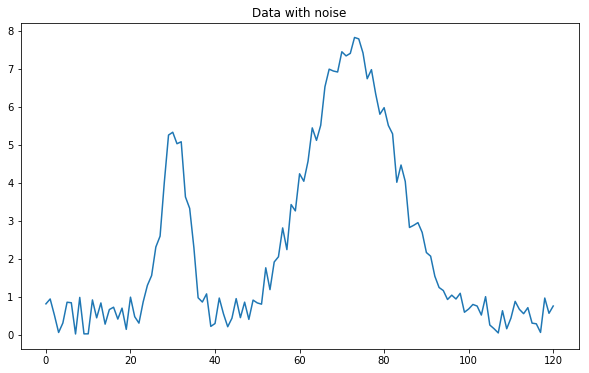

In [3]:
# Lets generate some noisy data from two Gaussians:
centers = (30.5, 72.3)
x = numpy.linspace(0, 120, 121)
y = (peakutils.gaussian(x, 5, centers[0], 3) +
peakutils.gaussian(x, 7, centers[1], 10) +
numpy.random.rand(x.size))
pyplot.figure(figsize=(10,6))
pyplot.plot(x, y)
pyplot.title("Data with noise")

[30 73]
[30. 73.] [5.32892339 7.82429817]


Text(0.5, 1.0, 'First estimate')

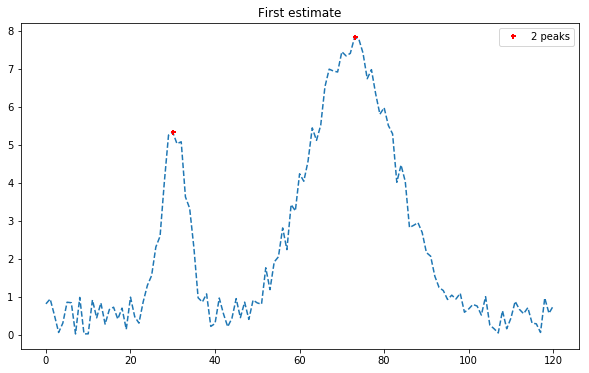

In [4]:
#Getting a first estimate of the peaks
#By using peakutils.indexes, we can get the indexes of the peaks from the data. Due to the noise, it will be just a rough
#approximation
indexes = peakutils.indexes(y, thres=0.5, min_dist=30)
print(indexes)
print(x[indexes], y[indexes])
pyplot.figure(figsize=(10,6))
pplot(x, y, indexes)
pyplot.title('First estimate')

In [5]:
# Enhancing the resolution by interpolation
# We can enhance the resolution by using interpolation. We will try to fit a Gaussian near each previously detected peak.
peaks_x = peakutils.interpolate(x, y, ind=indexes)
print(peaks_x)


[30.43072773 72.40579305]
